In [1]:
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rc('pdf', fonttype=42)

In [3]:
import collections

import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

# Timeline

In [4]:
_ = (
    pd.read_csv(
        'rehydrated_tweets_count_by_day.csv',
        parse_dates=['day'],
        index_col=['day', 'lang']
   )
    ['count']
    .unstack('lang', fill_value=0)
)

_['total'] = _.sum(axis=1)
_ = _[['lv', 'ru', 'en', 'total']]

timeline = _

In [5]:
timeline.head()

lang,lv,ru,en,total
day,,,,
2017-04-15,1304,360,133,1947
2017-04-16,1458,335,183,2189
2017-04-17,1353,286,172,1980
2017-04-18,2767,375,309,3631
2017-04-19,3135,442,306,4106


In [6]:
'Average tweet number per day: {:.0f}'.format(timeline['total'].mean())

'Average tweet number per day: 3159'

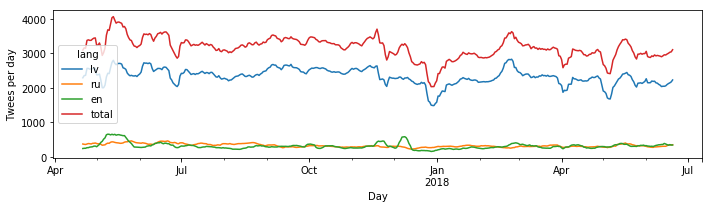

In [7]:
_ = (
    timeline
    .rolling(window=7).mean()
    .plot(figsize=(10, 3))
)

_.set(xlabel='Day', ylabel='Twees per day')


_.figure.tight_layout()
_.figure.savefig('rehydrated_tweets_count_by_day.pdf')

# Source statistics

In [8]:
sources = (
    pd.read_csv(
        'rehydrated_tweets_source_counts.csv',
        index_col=[
            'source_pretty',
            'total_count', 'total_share', 'tracked_source_share',
            'other_lang_count', 'other_lang_share',
            'lang',
        ],
        usecols=[
            'source_pretty',
            'total_count', 'total_share', 'tracked_source_share',
            'other_lang_count', 'other_lang_share',
            'lang',
            'source_lang_count', 'source_lang_share'
        ],
    )
    .unstack('lang', fill_value=0)
)

In [9]:
sources = (
    sources.reorder_levels([1, 0], axis=1)
    .reset_index()
    .set_index('source_pretty').sort_values('total_count', ascending=False)[
        [
            'total_count', 'total_share', 'tracked_source_share',
            'lv', 'ru', 'en',
            'other_lang_count', 'other_lang_share',
        ]
    ]
    .sort_values('total_count', ascending=False)
)

In [10]:
sources

lang                total_count total_share tracked_source_share  \
                                                                   
source_pretty                                                      
Twitter Web Client       465845       34.1%                52.4%   
Twitter for Android      227534       16.7%                 8.3%   
Twitter for iPhone       205280       15.0%                14.0%   
TweetDeck                104345        7.6%                91.7%   
TVNET Login               57733        4.2%                96.7%   
dlvr.it                   45337        3.3%                98.4%   
Facebook                  36327        2.7%                95.1%   
Foursquare                30708        2.3%                 0.0%   
Instagram                 24654        1.8%                 1.7%   
SKATIES                   22798        1.7%                98.0%   

lang                               lv                                  ru  \
                    source_lang_count source_lang_share source_lang_count   
source_pretty                                                               
Twitter Web Client             386342             82.9%             14718   
Twitter for Android            153578             67.5%             22351   
Twitter for iPhone             123388             60.1%             32796   
TweetDeck                      102261             98.0%                75   
TVNET Login                     26231             45.4%             30826   
dlvr.it                         44806             98.8%               134   
Facebook                        13741             37.8%             20833   
Foursquare                      24300             79.1%               220   
Instagram                        8801             35.7%              2450   
SKATIES                         22782             99.9%                 0   

lang                                                 en                    \
                    source_lang_share source_lang_count source_lang_share   
source_pretty                                                               
Twitter Web Client               3.2%             38715              8.3%   
Twitter for Android              9.8%             34632             15.2%   
Twitter for iPhone              16.0%             31829             15.5%   
TweetDeck                        0.1%              1470              1.4%   
TVNET Login                     53.4%                23              0.0%   
dlvr.it                          0.3%               129              0.3%   
Facebook                        57.3%               450              1.2%   
Foursquare                       0.7%              1881              6.1%   
Instagram                        9.9%              8164             33.1%   
SKATIES                             0                 0                 0   

lang                other_lang_count other_lang_share  
                                                       
source_pretty                                          
Twitter Web Client             26070             5.6%  
Twitter for Android            16973             7.5%  
Twitter for iPhone             17267             8.4%  
TweetDeck                        539             0.5%  
TVNET Login                      653             1.1%  
dlvr.it                          268             0.6%  
Facebook                        1303             3.6%  
Foursquare                      4307            14.0%  
Instagram                       5239            21.3%  
SKATIES                           16             0.1%

In [11]:
sources.to_latex('figures/rehydrated_tweets_source_counts.tex')

# Language usage 

In [12]:
rehydrated_tweets_language_counts = (
    pd.read_csv('rehydrated_tweets_language_counts.csv', index_col='lang')
)

In [13]:
rehydrated_tweets_language_counts

,count
lang,
en,135784
lv,1008189
ru,142730


In [14]:
(
    (rehydrated_tweets_language_counts / timeline['total'].sum())
    .style.format({'count': '{:.1%}'})
)

,count
lang,
en,9.9%
lv,73.9%
ru,10.5%


In [15]:
_ = (timeline['total'].sum() - rehydrated_tweets_language_counts.sum())[0]

__ = _ / rehydrated_tweets_language_counts.sum()[0]
f'{_}, {__:.1%}'

'78009, 6.1%'

In [16]:
_ = pd.read_csv('rehydrated_tweets_lang_usage.csv', index_col='rnum')

_['Language Uniformity Score'] = (_[['lv', 'ru', 'en']].max(axis=1) / _[['lv', 'ru', 'en']].sum(axis=1)).round(2)

lang_usage = _

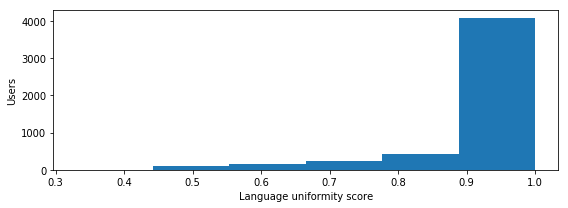

In [17]:
_ = lang_usage['Language Uniformity Score'].plot.hist(bins=6, figsize=(8, 3))

_.set(xlabel="Language uniformity score", ylabel="Users")
_.figure.tight_layout()

_.figure.savefig('rehydrated_tweets_lang_usage.pdf')

In [18]:
lang_usage.sort_values('Language Uniformity Score').head()

,lv,ru,en,total,Language Uniformity Score
rnum,,,,,
3836,7,7,7,30,0.33
1988,13,16,14,74,0.37
1572,16,20,14,97,0.40
4431,7,3,7,24,0.41
4357,4,5,3,25,0.42


# Language preference

## Monolingual

In [19]:
(
    lang_usage[
        (lang_usage[['lv', 'ru', 'en']] == 0).sum(axis='columns') == 2
    ]
    [['lv', 'ru', 'en']] > 0
).sum(axis='rows')

lv    1558
ru     134
en     313
dtype: int64

## Multilingual

In [20]:
(
    lang_usage[
        (lang_usage[['lv', 'ru', 'en']] > 0).sum(axis='columns') > 1
    ]
    [['lv', 'ru', 'en']]
    .replace(0, np.nan)
    .rank(axis='columns', method='min', ascending=False)
    .apply(lambda c: c.value_counts(), axis='rows')
)

,lv,ru,en
1.0,2221,335,488
2.0,543,228,2297
3.0,98,273,122


# Topics

In [21]:
relevance_judgments_count_by_day = (
    pd.read_csv(
        'relevance_judgments_count_by_day.csv',
        index_col=['day', 'topic_id'],
        parse_dates=['day'],
    )['count']
    .unstack('topic_id', fill_value=0)
)

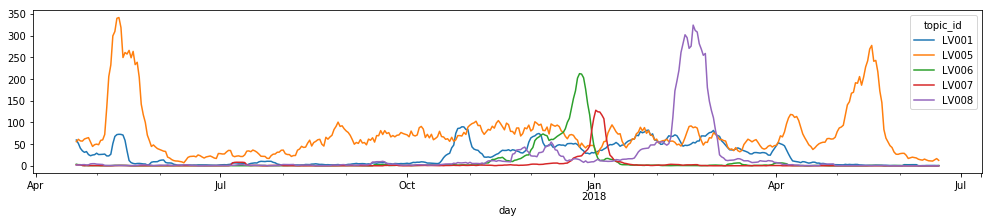

In [22]:
(
    relevance_judgments_count_by_day[
        ['LV001', 'LV005', 'LV006', 'LV007', 'LV008']]
    .rolling(window=7).mean()
    .plot(figsize=(17, 3))
);

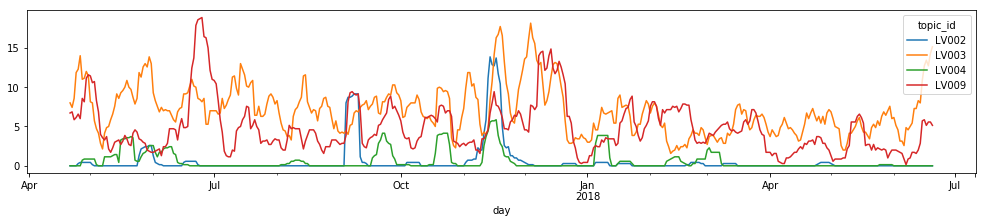

In [23]:
(
    relevance_judgments_count_by_day[['LV002', 'LV003', 'LV004', 'LV009']]
    .rolling(window=7).mean()
    .plot(figsize=(17, 3))
);

In [24]:
_ = (
    pd.read_csv(
        'relevance_judgments_lang_pref_by_day.csv',
        index_col=['day', 'topic_id'],
        parse_dates=['day'],
    )
)

_.columns = pd.MultiIndex.from_tuples(
    [
        ('Counts', 'Total'),
        ('Counts', 'lv, ru, en'),

        ('Tweets', 'lv'),
        ('Tweets', 'ru'),
        ('Tweets', 'en'),

        ('Users', 'lv'),
        ('Users', 'ru'),
        ('Users', 'en'),
    ],
    names=['Type', 'Language']
)
relevance_judgments_lang_pref_by_day = _

In [25]:
relevance_judgments_lang_pref_by_day.head()

Type                Counts            Tweets             Users            
Language             Total lv, ru, en     lv    ru    en    lv    ru    en
day        topic_id                                                       
2017-04-15 LV001        74         73   0.88  0.07  0.05  0.81  0.08  0.10
2017-04-16 LV001        77         77   0.94  0.01  0.05  0.92  0.02  0.05
2017-04-17 LV001        66         62   0.85  0.15  0.00  0.81  0.14  0.04
2017-04-18 LV001        46         46   0.91  0.09  0.00  0.89  0.10  0.01
2017-04-19 LV001        24         24   0.75  0.08  0.17  0.86  0.08  0.06

In [26]:
relevance_judgments_lang_pref_by_day['Counts', 'Total'].groupby(level='topic_id').sum()

topic_id
LV001     9796
LV002      215
LV003     2967
LV004      225
LV005    27966
LV006     3715
LV007     1484
LV008     7548
LV009     2034
LV010     1281
LV011     1079
LV012      496
LV013      797
LV014     1033
LV015     1205
LV016     6503
Name: (Counts, Total), dtype: int64

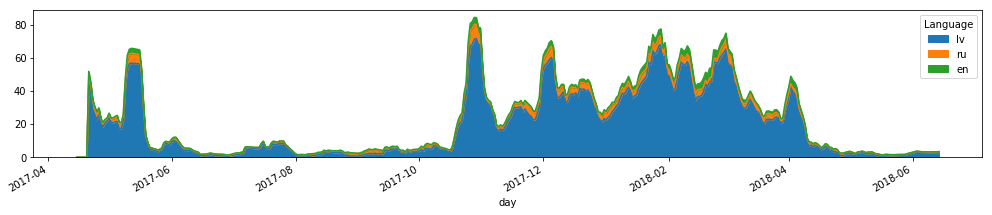

In [34]:
_ = relevance_judgments_lang_pref_by_day.loc[(slice(None), 'LV001'), :].reset_index('topic_id')

(
    _['Users']
    .multiply(
        _['Counts', 'lv, ru, en'],
        axis='rows',
    )
    .rolling(window=7).mean()
    .plot.area(figsize=(17, 3))
);

## Topics 2

In [28]:
_ = pd.read_csv(
    'relevance_judgments_lang_pref.csv',
    index_col=['topic_id', 'day', 'tweet_lang'],
    parse_dates=['day']
)

relevance_judgments_lang_pref = _

In [29]:
relevance_judgments_lang_pref.loc[['LV005']].head()

r_lv  r_ru  r_en
topic_id day        tweet_lang                  
LV005    2018-05-08 lv          0.66  0.01  0.33
         2018-05-12 lv          0.66  0.01  0.33
         2018-05-10 lv          0.66  0.01  0.33
         2018-05-06 lv          0.66  0.01  0.33
         2018-05-17 lv          0.66  0.01  0.33

In [30]:
_ = (
    relevance_judgments_lang_pref
    .groupby(level=['topic_id', 'tweet_lang']).size()
    .unstack('tweet_lang', fill_value=0)
    [['lv', 'ru', 'en']]
)

_total = _.sum(axis='columns')

__ = _.divide(_total, axis='rows')

__['total'] = _total
__.style.format({'lv': '{:.1%}', 'ru': '{:.1%}', 'en': '{:.1%}'})

__.to_latex('figures/topic_lang_counts.tex', float_format='{:.1%}'.format)

__

tweet_lang,lv,ru,en,total
topic_id,,,,
LV001,0.859508,0.096369,0.044122,9723
LV002,0.888372,0.009302,0.102326,215
LV003,0.888589,0.066847,0.044564,2962
LV004,1.000000,0.000000,0.000000,225
LV005,0.945188,0.024258,0.030555,26837
LV006,0.865363,0.046256,0.088381,3632
LV007,0.772324,0.143149,0.084526,1467
LV008,0.953433,0.039782,0.006786,7516
LV009,0.845320,0.048768,0.105911,2030


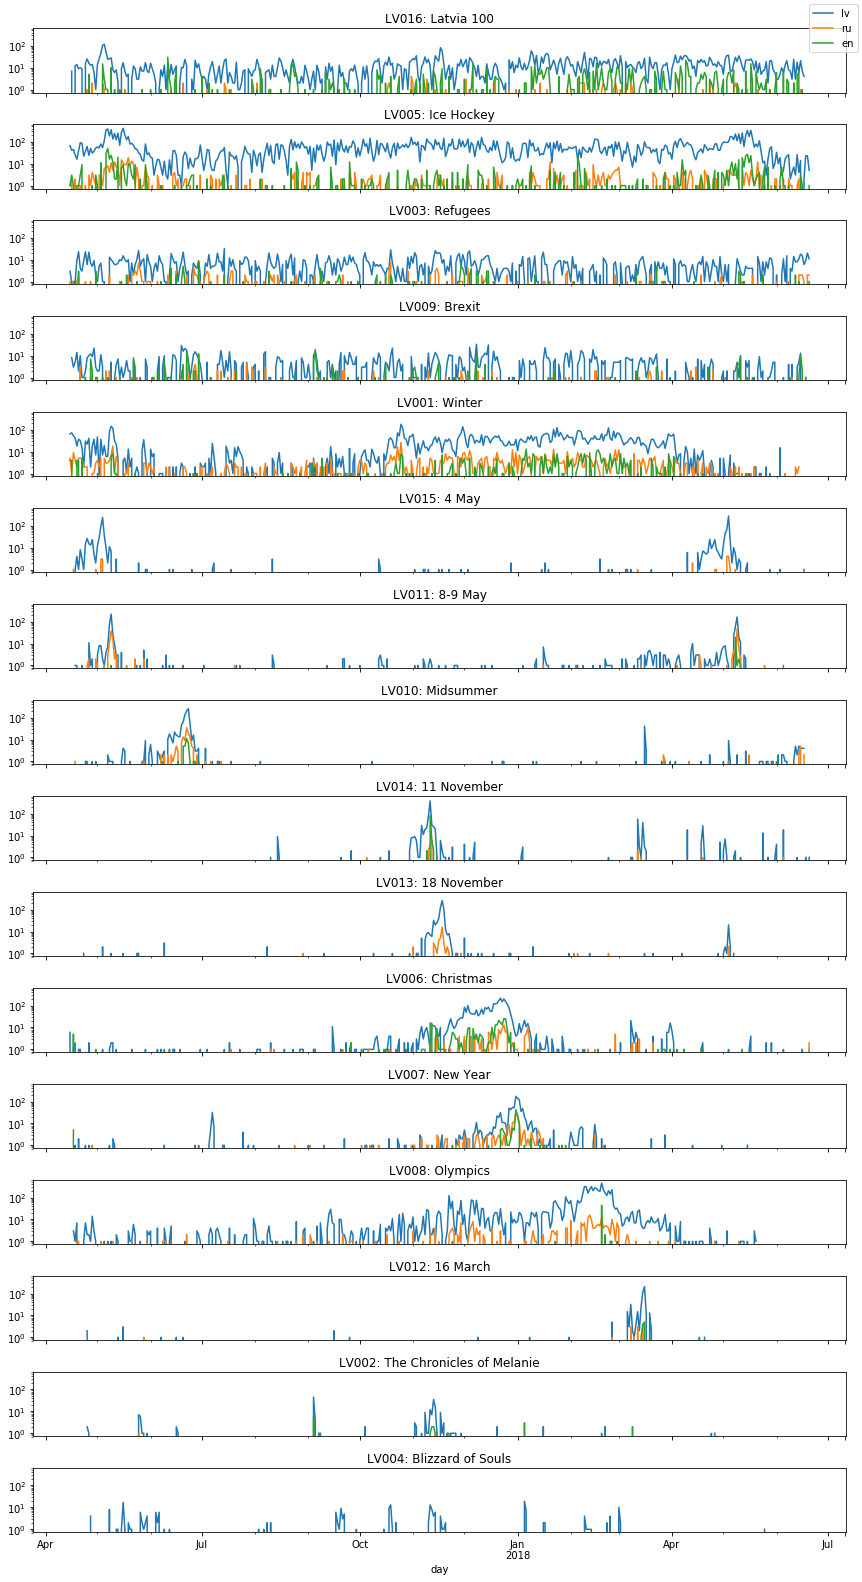

In [31]:
_data = (
    relevance_judgments_lang_pref
    .groupby(level=['topic_id', 'day' ,'tweet_lang']).size()
    .unstack('tweet_lang', fill_value=0)
    [['lv', 'ru', 'en']]
)


topics = collections.OrderedDict(
    [

        ('LV016', 'Latvia 100'),
        ('LV005', 'Ice Hockey'),
        ('LV003', 'Refugees'),
        ('LV009', 'Brexit'),

        ('LV001', 'Winter'),

        ('LV015', '4 May'),
        ('LV011', '8-9 May'),
        ('LV010', 'Midsummer'),
        ('LV014', '11 November'),
        ('LV013', '18 November'),
        ('LV006', 'Christmas'),
        ('LV007', 'New Year'),
        ('LV008', 'Olympics'),
        ('LV012', '16 March'),

        ('LV002', 'The Chronicles of Melanie'),
        ('LV004', 'Blizzard of Souls'),
 
     ]
)

fig, axs = plt.subplots(len(topics), 1, sharex=True, sharey=True, figsize=(12, 22))

axs = axs.flatten()


for (topic, topic_title), ax in zip (topics.items(), axs):

    _ = (
        _data.loc[topic]
        .resample('1d', level='day').sum()
        .plot.line(ax=ax, logy=True, legend=False, title=f'{topic}: {topic_title}')
    );
    
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

fig.tight_layout()
fig.savefig('topic_timeline.pdf')